In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [40]:
one_encoder = OneHotEncoder()
scaler = StandardScaler()
robust_scaler = RobustScaler()
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

In [31]:
copy_df = pd.read_csv('../data/Iris.csv').drop_duplicates().drop('Id',axis=1)

In [38]:
copy_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [39]:
copy_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


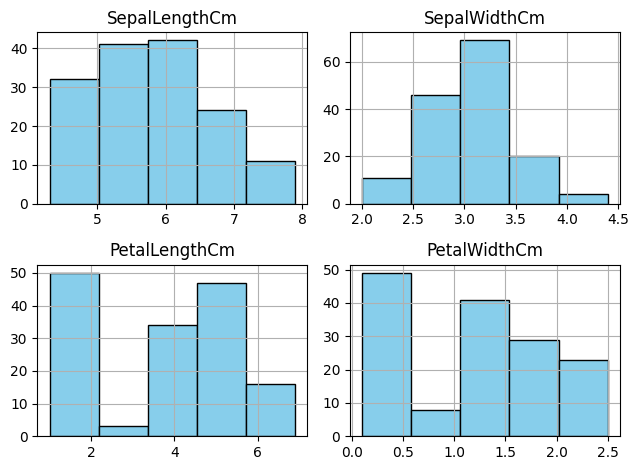

In [35]:
copy_df.hist(bins=5,color='skyblue',edgecolor='black')
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()

In [83]:
ct_array = []
X = copy_df.drop('Species',axis=1)
numerical_feature_array=['SepalLengthCm','SepalWidthCm','PetalWidthCm']
category_feature_array=['Species']
robust_feature_array=['PetalLengthCm',]
if len(numerical_feature_array):
    ct_array.append(('numeric',scaler,numerical_feature_array))
if len(robust_feature_array):
    ct_array.append(('robust',robust_scaler,robust_feature_array))
preprocessor = ColumnTransformer(ct_array)

encoded_df = preprocessor.fit_transform(X)
features = preprocessor.get_feature_names_out()
X = pd.DataFrame(encoded_df,columns=features)

In [91]:
y = copy_df['Species']
y_counts = y.value_counts()
y_features = y.value_counts().index
y_features
y = label_encoder.fit_transform(y)

In [95]:
y_counts

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

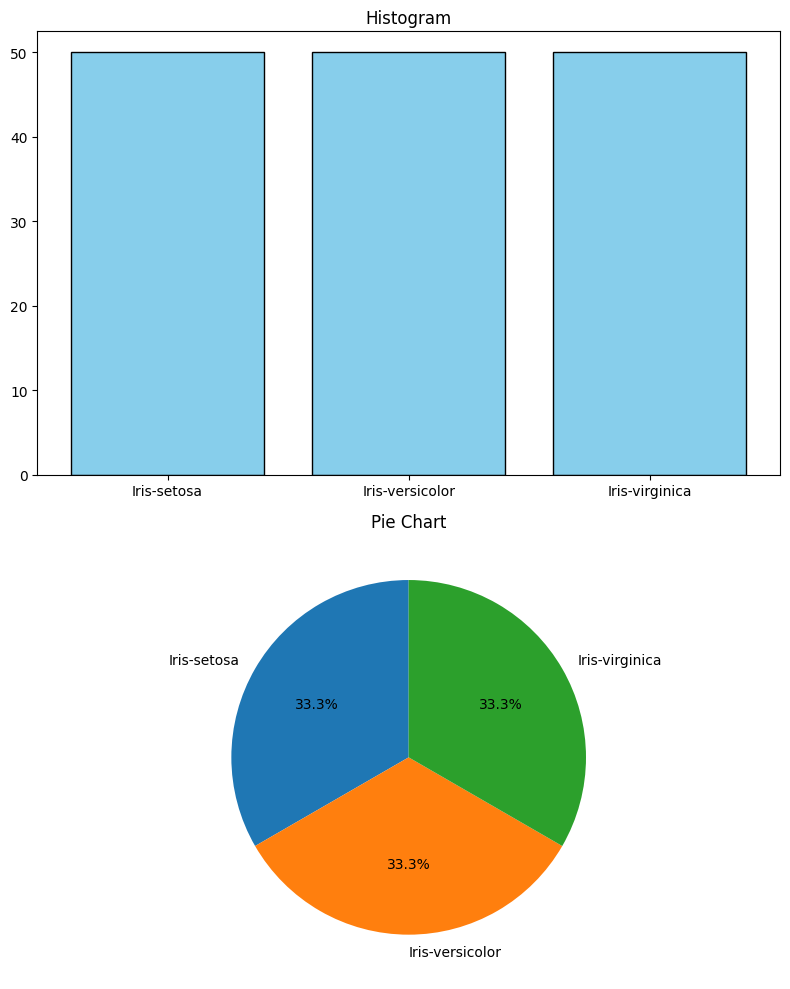

In [100]:

fig,(ax1,ax2) = plt.subplots(2,1, figsize=(8,10))
ax1.bar(y_features,y_counts,color='skyblue',edgecolor='black')
ax1.set_title('Histogram')
ax2.pie(y_counts,labels=y_features,autopct='%1.1f%%',
       startangle=90)
ax2.set_title('Pie Chart')
fig.tight_layout()

fig.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.show()

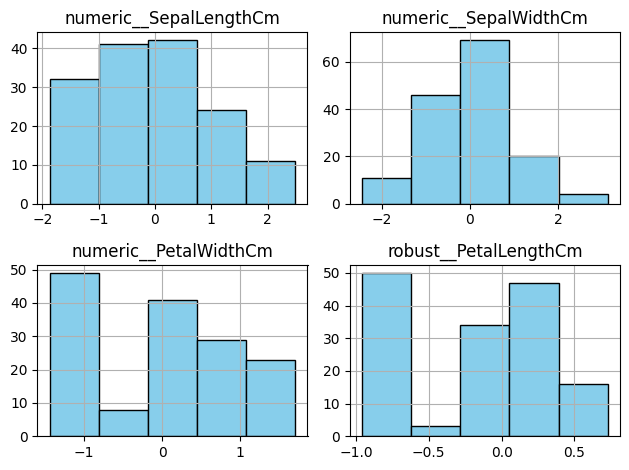

In [63]:
X.hist(bins=5,color='skyblue',edgecolor='black')
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

(150, 5)